# Notebook to generate top 10 most similar words

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Data

In [3]:
mean_similarity_df = pd.read_pickle("../../data/similarity_df_mean.pkl")

### Lollipop graphs


In [7]:
SMALL_SIZE = 12
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

def lolli_graph(tuple_tokens_list, 
                ax,
                title='Most common words in the corpus',
                line_color='skyblue',
                point_color='steelblue'
               ):
    top_20_tokens_sorted = sorted(tuple_tokens_list, key=lambda x: x[1])
    top_20_words, top_20_counts = zip(*top_20_tokens_sorted)
    ax.hlines(y=top_20_words, 
               xmin=0, xmax=top_20_counts, color=line_color, linewidth=3)
    ax.plot(top_20_counts, top_20_words, "o", color=point_color)
    ax.set_xlim([0, 1])
    # ax.ylabel('Words', fontsize=14)
    ax.set_xlabel('Similarity', fontsize=14)
    ax.set_title(title, fontsize=16)

    # plt.show()

In [8]:
word_interest = "racism"
racism_top10 = mean_similarity_df.sort_values(by= word_interest, ascending=False).iloc[1:11][word_interest]

word_interest = "bias"
bias_top10 = mean_similarity_df.sort_values(by= word_interest, ascending=False).iloc[1:11][word_interest]

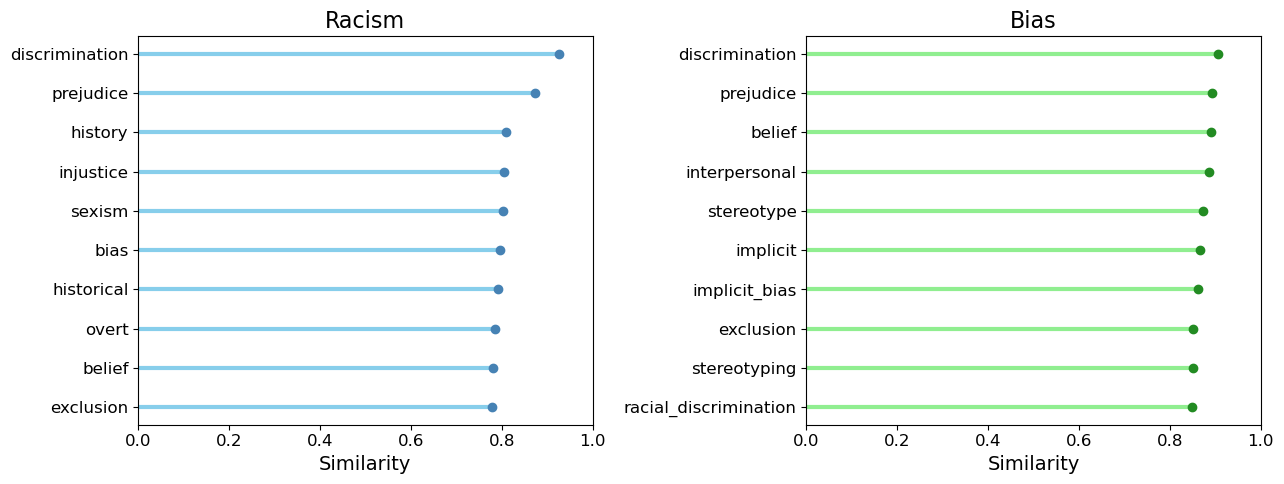

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5), layout="tight")

lolli_graph([(k, racism_top10[k]) for k in racism_top10.keys()], ax1, title="Racism")

lolli_graph([(k, bias_top10[k]) for k in bias_top10.keys()], ax2,
            title='Bias',
            line_color='lightgreen', point_color='forestgreen')


# plt.savefig('../../results/figures/example_top10.png')